In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import os

temp = os.getcwd()
print(f'Current working directory: {temp}')
if '/project2' in temp:
    temp = temp.replace('/project2', '')
    os.chdir(temp)
    print(f'Switched to: {temp}')

Current working directory: /Users/marco/dev/time-series


In [146]:
def import_stocks(name):
    df = pd.read_excel('data/'+str(name)+'.xlsx', header=3, index_col='Date')
    df = df.reindex(index=df.index[::-1])           # Go from old to new, instead of new to old
    df.index = pd.to_datetime(df.index)
    return df

def calc_log_returns(df):
    df['Log-Close'] = np.log(df['Close'])
    df['Log-Return'] = df['Log-Close'].diff()
    return 

names = ['EDP RENOVAVEISprice', 'GALP ENERGIA-NOMprice', 'MOTA ENGILprice', 'NOSSGPSprice', 'NOVABASESGPSprice']

edp = import_stocks(names[0])
galp = import_stocks(names[1])
mota = import_stocks(names[2])
noss = import_stocks(names[3])
nova = import_stocks(names[4])

for stock_df in [edp, galp, mota, noss, nova]:
    calc_log_returns(stock_df)                              # Add new column with log return                     
    stock_df.drop(index=stock_df.index[0], axis=0, inplace=True)  # Drop first row, because no log return 

edp

,Open,High,Low,Close,Number of Shares,Number of Trades,Turnover,vwap,Log-Close,Log-Return
Date,,,,,,,,,,
2020-03-23,9.00,9.01,8.43,8.89,979383,2492,8547957,8.7279,2.184927,-0.048308
2020-03-24,9.01,9.56,8.87,9.56,985463,2133,9045053,9.1785,2.257588,0.072661
2020-03-25,9.80,10.14,9.27,9.75,539976,1103,5248850,9.7205,2.277267,0.019680
2020-03-26,9.56,10.20,9.36,10.20,495769,1401,4862624,9.8082,2.322388,0.045120
2020-03-27,10.02,10.28,9.88,10.08,422322,985,4271185,10.1136,2.310553,-0.011834
...,...,...,...,...,...,...,...,...,...,...
2022-03-07,20.54,22.06,20.40,21.76,1630709,4034,35106991,21.5287,3.080073,0.054782
2022-03-08,21.50,23.00,21.50,22.62,1851121,6269,41788673,22.5748,3.118834,0.038761
2022-03-09,23.22,23.76,22.20,23.18,1504596,4702,34471844,22.9110,3.143290,0.024455


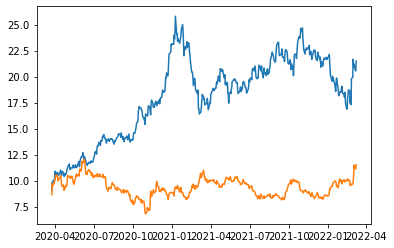

In [143]:

plt.plot(edp.Open)
plt.plot(galp.Open)
plt.plot()
plt.show()

In [144]:
def calc_log_returns(df):
    df['Log-Close'] = np.log(df['Close'])
    df['Log-Return'] = df['Log-Close'].diff()
    return 

for stock in [edp, galp, mota, noss, nova]:
    data.reindex(index=data.index[::-1])
    calc_log_returns(stock)

#edp_log = edp['Log-Return'][1:]

edp_log


NameError: name 'data' is not defined

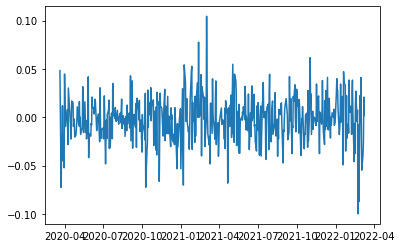

In [ ]:
plt.plot(edp['Log-Return'])
plt.show()

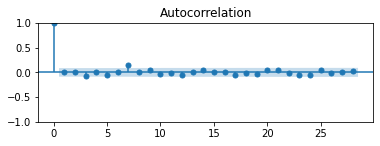

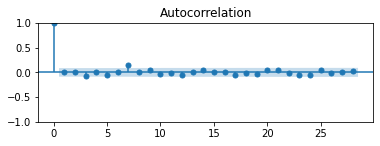

In [ ]:
#fig = plt.figure(figsize=(20,20))
edp = edp[1:]
edp['Log-Return']

plot_acf(edp['Log-Return'], ax=plt.subplot(2, 1, 1))
#plot_pacf(edp['Log-Return'], ax=plt.subplot(2, 1, 2))

In [ ]:
model = arch_model(edp, mean='Zero', vol='GARCH', p=15, q=15)

ValueError: y must be squeezable to 1 dimension